**MÓDULO 4 - PLATAFORMAS DE VISUALIZACIÓN**

---

**SESIÓN: Aprende**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **TEMA 1. Exploración y validación de datos**

## 1.1 Rangos típicos, categorías y valores faltantes

Sube a tu drive los dos archivos csv que el instructor te proporcionará y crea una nueva libreta en Colab para:

*   Leer dichos archivos en dos dataframes: `countries` y `cities` 


In [20]:
# Visualizar las categorias por variable
countries = pd.read_csv('world_table_country.csv')
countries.nunique()

Code              239
Name              239
Continent           7
Region             25
SurfaceArea       238
IndepYear          88
Population        226
LifeExpectancy    160
GNP               214
GNPOld            178
LocalName         239
GovernmentForm     35
Capital           232
dtype: int64

In [15]:

countries['Continent'].unique()

array(['North America', 'Asia', 'Africa', 'Europe', 'South America',
       'Oceania', 'Antarctica'], dtype=object)

In [16]:


countries['Continent'].value_counts()

Africa           58
Asia             51
Europe           46
North America    37
Oceania          28
South America    14
Antarctica        5
Name: Continent, dtype: int64

In [19]:
#Valores perdidos por columna

countries.isna().sum()

Code               0
Name               0
Continent          0
Region             0
SurfaceArea        0
IndepYear         47
Population         0
LifeExpectancy    17
GNP                0
GNPOld            61
LocalName          0
GovernmentForm     0
Capital            7
dtype: int64

In [23]:
# Borrar los datos que tienen un NaN en 'Capital'
countries[countries['Capital'].isna()]

,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,Capital
11,ATA,Antarctica,Antarctica,Antarctica,13120000.0,NaN,0,NaN,0.0,NaN,–,Co-administrated,NaN
12,ATF,French Southern territories,Antarctica,Antarctica,7780.0,NaN,0,NaN,0.0,NaN,Terres australes françaises,Nonmetropolitan Territory of France,NaN
34,BVT,Bouvet Island,Antarctica,Antarctica,59.0,NaN,0,NaN,0.0,NaN,Bouvetøya,Dependent Territory of Norway,NaN
93,HMD,Heard Island and McDonald Islands,Antarctica,Antarctica,359.0,NaN,0,NaN,0.0,NaN,Heard and McDonald Islands,Territory of Australia,NaN
100,IOT,British Indian Ocean Territory,Africa,Eastern Africa,78.0,NaN,0,NaN,0.0,NaN,British Indian Ocean Territory,Dependent Territory of the UK,NaN
187,SGS,South Georgia and the South Sandwich Islands,Antarctica,Antarctica,3903.0,NaN,0,NaN,0.0,NaN,South Georgia and the South Sandwich Islands,Dependent Territory of the UK,NaN
221,UMI,United States Minor Outlying Islands,Oceania,Micronesia/Caribbean,16.0,NaN,0,NaN,0.0,NaN,United States Minor Outlying Islands,Dependent Territory of the US,NaN


In [25]:
cities = pd.read_csv('world_table_city.csv')
cities.head()

,ID,Name,CountryCode,District,Population
0,1,Kabul,AFG,Kabol,1780000
1,2,Qandahar,AFG,Qandahar,237500
2,3,Herat,AFG,Herat,186800
3,4,Mazar-e-Sharif,AFG,Balkh,127800
4,5,Amsterdam,NLD,Noord-Holland,731200


*   Realizar un análisis de la estructura de `countries`



*   Explorar el contenido de `countries`



*   Borrar los registros que tengan `NaN` en la columna `Capital`


In [27]:
countries.dropna(axis=0,subset=['Capital'],inplace=True)
countries.isna().sum()

Code               0
Name               0
Continent          0
Region             0
SurfaceArea        0
IndepYear         40
Population         0
LifeExpectancy    10
GNP                0
GNPOld            54
LocalName          0
GovernmentForm     0
Capital            0
dtype: int64

*   Ejecutar el mismo análisis con `cities` 


In [32]:
cities.isna().sum()

ID             0
Name           0
CountryCode    0
District       4
Population     0
dtype: int64



*   Combinar ambos dataframes 




In [41]:
df = pd.merge(countries,cities,left_on='Capital',right_on='ID',how="inner",suffixes=('Country','City'))
df.head(1)

,Code,NameCountry,Continent,Region,SurfaceArea,IndepYear,PopulationCountry,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,Capital,ID,NameCity,CountryCode,District,PopulationCity
0,ABW,Aruba,North America,Caribbean,193.0,NaN,103000,78.4,828.0,793.0,Aruba,Nonmetropolitan Territory of The Netherlands,129.0,129,Oranjestad,ABW,–,29034


## 1.2 Distribuciones y estadísticas

*   ¿Cuál es el promedio de población para el conjunto de países analizados? 

*   ¿Qué superficie territorial tiene el país más pequeño? ¿Y el más grande? 

In [51]:
countries[countries['SurfaceArea'] ==countries['SurfaceArea'].min()]
countries[countries['SurfaceArea'] ==countries['SurfaceArea'].max()]


,Code,Name,Continent,Region,SurfaceArea,IndepYear,Population,LifeExpectancy,GNP,GNPOld,LocalName,GovernmentForm,Capital
181,RUS,Russian Federation,Europe,Eastern Europe,17075400.0,1991.0,146934000,67.2,276608.0,442989.0,Rossija,Federal Republic,3580.0


*   ¿Cuál es la desviación estándar de la expectativa de vida? 

In [60]:
pd.options.display.float_format ='{:.2f}'.format
df.describe()

,SurfaceArea,IndepYear,PopulationCountry,LifeExpectancy,GNP,GNPOld,Capital,ID,PopulationCity
count,232.00,192.00,232.00,222.00,232.00,178.00,232.00,232.00,232.00
mean,585448.76,1847.26,26201506.25,66.49,126529.78,165534.31,2071.31,2071.31,1078091.13
std,1768330.08,420.83,110893101.65,11.52,647228.36,720468.91,1184.10,1184.10,1818042.50
min,0.40,-1523.00,50.00,37.20,0.00,157.00,1.00,1.00,42.00
25%,2769.75,1906.75,303500.00,60.30,807.50,2187.00,915.75,915.75,40750.00
50%,81233.00,1960.00,4419500.00,70.15,5224.50,8421.00,2449.50,2449.50,435169.00
75%,414643.25,1974.00,15374250.00,75.50,34606.00,71145.50,3065.25,3065.25,1186844.50
max,17075400.00,1994.00,1277558000.00,83.50,8510700.00,8110900.00,4074.00,4074.00,9981619.00


*   ¿Qué significa que para el año de independencia está 1974 en el 3er cuartil (75%)? 

# **TEMA 2. Plataformas de visualización en Python**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2.1 Trazado básico y personalización de la estética

*   Generar un nuevo dataframe (`sample`) con los 6 primeros registros de `countries` y dejando únicamente las columnas `Name` y `Population` 

In [66]:
df.columns

Index(['Code', 'NameCountry', 'Continent', 'Region', 'SurfaceArea',
       'IndepYear', 'PopulationCountry', 'LifeExpectancy', 'GNP', 'GNPOld',
       'LocalName', 'GovernmentForm', 'Capital', 'ID', 'NameCity',
       'CountryCode', 'District', 'PopulationCity'],
      dtype='object')

In [68]:
dataframe = pd.DataFrame(df[['NameCountry','PopulationCountry']]).head()

<AxesSubplot:>

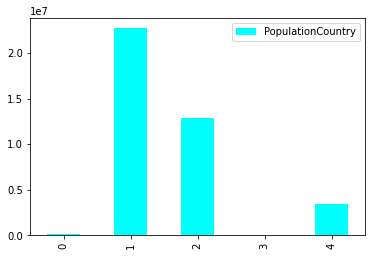

In [73]:
dataframe.plot(kind='bar',color='cyan')

*   Hacer que `Name` sea el índice

In [ ]:
sample

*   Visualizar `sample` usando las tres plataformas de trazado

*   Cambiar las propiedades: `title`, `grid`, `legend`, `xlabel`, `ylabel`, `rot`, `fontsize`, `color`, `marker` y `linestyle` de la gráfica generada con Pandas 

*   Probar con otro dataframe (`sample2`) que almacene los 6 primeros registros de `countries`, pero con todas sus columnas 

In [74]:
sample2 = countries.head()


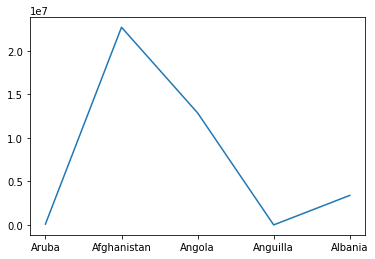

In [77]:
#Matplotlib
plt.plot(sample2['Name'],sample2['Population'])

<AxesSubplot:xlabel='Name'>

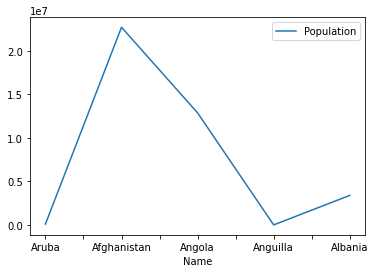

In [78]:
#Pxndxs

sample2.plot(x='Name',y='Population')

<AxesSubplot:xlabel='Name', ylabel='Population'>

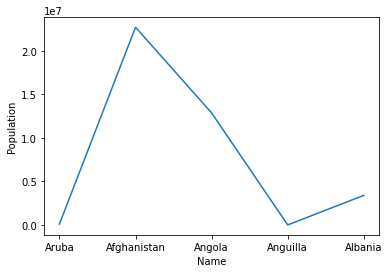

In [80]:
sns.lineplot(x=sample2['Name'],y=sample2['Population'])

*   Cambiar el tipo de gráfico a barras horizontales usando el argumento `kind`

<BarContainer object of 5 artists>

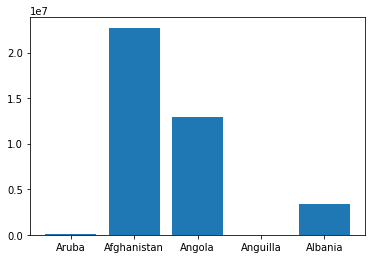

In [81]:
#Matplotlib
plt.bar(sample2['Name'],sample2['Population'])

<AxesSubplot:xlabel='Name'>

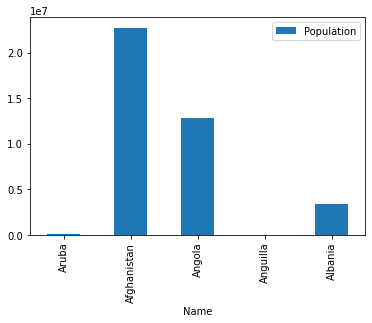

In [82]:
#Pxndxs

sample2.plot(x='Name',y='Population',kind='bar')

<AxesSubplot:xlabel='Name', ylabel='Population'>

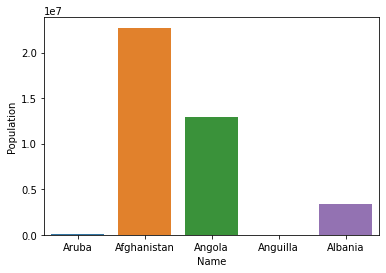

In [83]:
sns.barplot(x=sample2['Name'],y=sample2['Population'])

## 2.2 Agrupamiento y filtrado

*   Generar un nuevo dataframe (`population_by_continent`) con el resultado de agrupar la columna `Population` con el total por continente 

In [86]:
dframe = countries[['Continent','Population']].groupby(['Continent']).sum()
dframe

,Population
Continent,
Africa,784475000
Asia,3705025700
Europe,730074600
North America,482993000
Oceania,30401150
South America,345780000


*   Graficar los resultados usando un gráfico pie de Pandas

In [95]:
sns.set_palette('Set2')

<AxesSubplot:ylabel='Population'>

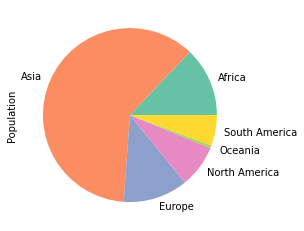

In [96]:
dframe.plot(kind='pie',y='Population',legend=False)

*   Graficar el número de países por continente usando la función `countplot() `de Seaborn 

<AxesSubplot:xlabel='Continent', ylabel='count'>

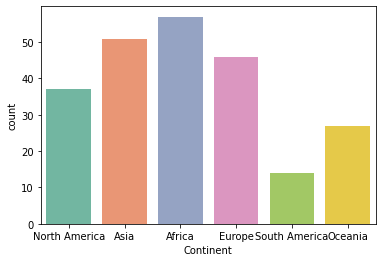

In [100]:
sns.countplot(x=countries['Continent'])

*   Cambiar la paleta de colores y el tema con Seaborn

# **TEMA 3. Gráficas superpuestas**

##3.1 Compartiendo ambos ejes

*   Generar un nuevo dataframe (`gnp_by_continent`) con el resultado de agrupar las columnas `GNP` y `GNPOld` con el promedio por continente 

In [102]:
df_by_continent = countries[['Continent','GNP','GNPOld']].groupby(['Continent']).mean()
df_by_continent

,GNP,GNPOld
Continent,,
Africa,10182.02,11065.28
Asia,150105.73,183377.09
Europe,206497.07,260611.14
North America,261854.79,371527.00
Oceania,15547.21,46905.80
South America,107991.00,126720.08


*   Graficar los resultados usando las tres plataformas de trazado

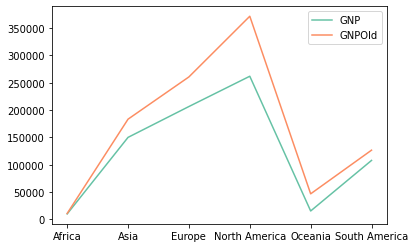

In [104]:
# Matplotlib

plt.plot(df_by_continent)
plt.legend(df_by_continent.columns)

<AxesSubplot:xlabel='Continent'>

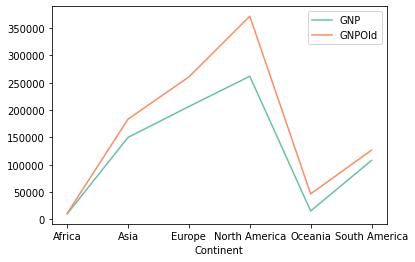

In [105]:
#Pandas 

df_by_continent.plot()

<AxesSubplot:xlabel='Continent'>

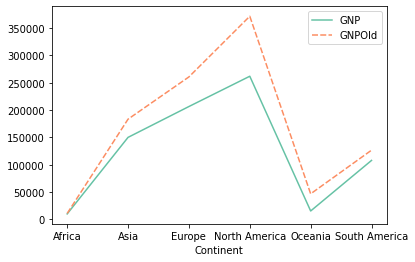

In [106]:
#Seaborn 
sns.lineplot(data=df_by_continent)

## 3.2 Compartiendo el eje horizontal con ejes verticales independientes

*   Generar un nuevo dataframe (`summary_by_continent`) con el resultado de agrupar las columnas `LifeExpectancy` y `GNP` con el promedio por continente

In [108]:
summary_by_continent = countries[['Continent','LifeExpectancy','GNP']].groupby(['Continent']).mean()
summary_by_continent

,LifeExpectancy,GNP
Continent,,
Africa,52.57,10182.02
Asia,67.44,150105.73
Europe,75.15,206497.07
North America,72.99,261854.79
Oceania,69.72,15547.21
South America,70.95,107991.00


<AxesSubplot:xlabel='Continent'>

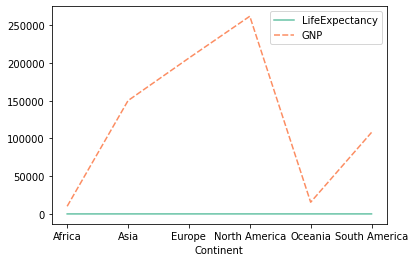

In [109]:
#Seaborn 
sns.lineplot(data=df_by_continent)

*   Crear un eje vertical dual o secundario 

In [ ]:
# Matplotlib

plt.plot(df_by_continent)
plt.legend(df_by_continent.columns)

*   Graficar `LifeExpectancy` en el eje vertical izquierdo con color azul

Text(0.5, 1.0, 'Life Expectancy vs GNP')

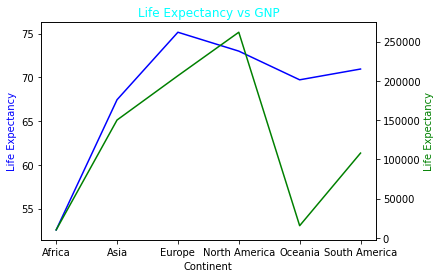

In [124]:
fif,ax1 = plt.subplots()

#Matplotlb
# #ax1.plot(summary_by_continent.index,summary_by_continent['LifeExpectancy'],color='blue')

#Pandas
summary_by_continent['LifeExpectancy'].plot(color='blue',ax=ax1)

#Seaborn

ax1.set_ylabel('Life Expectancy',color='blue')

# Definir gemelo con eje compartido twinx comparten eje x twiny comparten eje y
ax2 = ax1.twinx()

ax2.plot(summary_by_continent.index,summary_by_continent['GNP'],color='green')
ax2.set_ylabel('Life Expectancy',color='green')

ax1.set_title('Life Expectancy vs GNP',color='cyan')

*   Graficar `GNP` en el eje vertical derecho con color verde